# General Stuff

In [5]:
# import requests

# # Define the URL of your FastAPI server
# url = "http://localhost:8000"  # Update with your server's URL

# # Define the data to send as JSON
# data = {
#     "text1": "Input Text 1",
#     "text2": "Input Text 2"
# }

# # Send a POST request with JSON data
# response = requests.post(url, json=data)

# # Check the response
# if response.status_code == 200:
#     result = response.json()
#     similarity = result["similarity"]
#     print(f"Cosine Similarity: {similarity}")
# else:
#     print(f"Request failed with status code: {response.status_code}")

In [3]:
import requests

# Define the URL of your FastAPI server
url = "http://localhost:8000/add_person"  # Update with your server's URL

# Define the data to send as JSON
person_data = {
    "first_name": "enas",
    "last_name": "khwaileh",
    "age": 35
}

# Send a POST request with JSON data to add a person
response = requests.post(url, json=person_data)

# Check the response
if response.status_code == 200:
    result = response.json()
    print(result["message"])
else:
    print(f"Request failed with status code: {response.status_code}")


Person added successfully


In [2]:
import os
os.listdir("uploads")

['test.csv', 'test2.csv', 'test3.csv']

In [13]:
import sentence_transformers
from sentence_transformers import SentenceTransformer, util
import numpy as np
import pandas as pd


db = np.array(['Data Scientist',' Machine Learning Engineer','Data Analyst', 'Software Developer','Front End Developer','Back End Developer','Mathematician','Physicist'])
model = SentenceTransformer("all-mpnet-base-v2")
encodings = model.encode(db)
k=5
query = 'ML Engineer'
query_emb = model.encode(query)
cos_sims = util.cos_sim(query_emb, encodings).numpy()[0]
top_k_indices = np.argsort(-cos_sims)[:k]

top_k_results = list(zip(db[top_k_indices],cos_sims[top_k_indices]))
top_k_results = pd.DataFrame(top_k_results, columns=['TableName','SimilarityScore']).to_dict()

{'TableName': {0: ' Machine Learning Engineer',
  1: 'Data Scientist',
  2: 'Data Analyst',
  3: 'Software Developer',
  4: 'Physicist'},
 'SimilarityScore': {0: 0.8346510529518127,
  1: 0.6666718125343323,
  2: 0.6132876873016357,
  3: 0.563723087310791,
  4: 0.5109235644340515}}

In [1]:
import os
from os.path import isfile, join
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch
from prettytable import PrettyTable


c:\Users\leandros\Documents\GitHub\mira_gui\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
datasetpath =  f"semantic_matching/data/GroundTruth_Data/"
embeddingspath = f"semantic_matching/data/newdataembedding/"

files = [f for f in os.listdir(datasetpath) if (isfile(join(datasetpath, f)) and f.endswith('.csv'))]
embeddingsFiles = [f for f in os.listdir(embeddingspath) if (isfile(join(embeddingspath, f)) and f.endswith('.pt'))]

embeddings = torch.empty(0, device = 'cpu')
for embeddingsFile in embeddingsFiles:
    embeddingsOffile = torch.load(embeddingspath+ embeddingsFile, map_location=torch.device('cpu'))
    embeddings = torch.concat([embeddings, embeddingsOffile])

In [15]:
filesContent = {}
content = []

for file in files:
    try:
        df = pd.read_csv( datasetpath + file, encoding = "ISO-8859-1", on_bad_lines = "skip")
        filesContent[file] = df.columns.tolist()
        content += df.columns.tolist()
        for row in df.values:
            filesContent[file] += list(map(str,row))
            content += list(map(str,row))
    except Exception as e:
        print(f"Error in reading a csv file: file name: {file}, Error message: {e}")

Error in reading a csv file: file name: Airbnb_Open_Data.csv, Error message: Error tokenizing data. C error: EOF inside string starting at row 36


In [5]:
os.listdir(datasetpath)

['GroundTruth_Data']

In [19]:

model = SentenceTransformer("all-mpnet-base-v2")

query_embedding1 = model.encode('Computer Scientist')
query_embedding2 = model.encode('parental level of education')
cos_sims = util.cos_sim(query_embedding1, query_embedding2).numpy()[0]
cos_sims

array([0.18616231], dtype=float32)

In [ ]:
import os
from os.path import isfile, join
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import torch
from prettytable import PrettyTable

def readFiles():

	datasetpath =  f"../data/GroundTruth_Data/"
	embeddingspath = f"../data/newdataembedding/"

	files = [f for f in os.listdir(datasetpath) if (isfile(join(datasetpath, f)) and f.endswith('.csv'))]
	embeddingsFiles = [f for f in os.listdir(embeddingspath) if (isfile(join(embeddingspath, f)) and f.endswith('.pt'))]
	
	embeddings = torch.empty(0, device = 'cpu')
	for embeddingsFile in embeddingsFiles:
		embeddingsOffile = torch.load(embeddingspath+ embeddingsFile)
		embeddings = torch.concat([embeddings, embeddingsOffile])

	
	filesContent = {}
	content = []
	
	for file in files:
		try:
			df = pd.read_csv( datasetpath + file, encoding = "ISO-8859-1", on_bad_lines = "skip")
			filesContent[file] = df.columns.tolist()
			content += df.columns.tolist()
			for row in df.values:
				filesContent[file] += list(map(str,row))
				content += list(map(str,row))
		except Exception as e:
			print(f"Error in reading a csv file: file name: {file}, Error message: {e}")
		
	return filesContent, content, embeddings

def getMeXResults(X,top_results, filesContent, content):
	XResults = []
	i = 0
	cellsFileCombi = []
	for score, idx in zip(top_results[0], top_results[1]):
		if float("{:.4f}".format(score)) >= 0.3:
			for filename, val in filesContent.items():
				if content[idx] in val:
					if (filename, content[idx]) not in cellsFileCombi:
						cellsFileCombi.append((filename, content[idx]))
						XResults.append((filename, content[idx], score))
						i += 1
						if i == X:
							return XResults
	return XResults

def results(query, filesContent, content, embeddings):   
	
	symmetric_embedder = SentenceTransformer('all-mpnet-base-v2')
	results = {}
	
	query_embedding = symmetric_embedder.encode(query, convert_to_tensor = True)
	top_k = min(10, len(embeddings))
	cos_scores = util.cos_sim(query_embedding, embeddings)[0]
	top_results = torch.topk(cos_scores, len(embeddings), sorted = True)
	
	results = getMeXResults(top_k, top_results, filesContent, content)
	return results

def matching():
	filesContent, content, embeddings = readFiles()
	while True:
		query = "Rock Music"
		result = results(query, filesContent, content, embeddings)
		print("============================")
		print(f"your query is: {query}")
		
		table = [['Filename', 'Cell Value', 'Score']]
		for i in result:
			table.append([i[0], i[1], "{:.4f}".format(i[2])])
		tab = PrettyTable(table[0])
		tab.add_rows(table[1:])
		print(tab)
		
if __name__ == "__main__":
	matching()


# Embeddings generation

In [148]:
import os
import torch
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer, util

In [ ]:
model = SentenceTransformer("all-mpnet-base-v2")

In [152]:

def create_embeddings(table_name, base_path):

    if os.path.exists(base_path + table_name.replace('.csv', '.pt') ):
        return 'Embeddings file already exist'

    df = pd.read_csv(base_path + table_name)

    col_names = df.columns.tolist()
    df_columns = pd.DataFrame([col_names], columns=col_names)

    df = pd.concat([df_columns,df], ignore_index=True)
    df = df.map(lambda cell_value: str(cell_value))
    cell_values_flat = df.values.flatten()

    # Create embeddings for all cell values
    embeddings_list_flat = model.encode(cell_values_flat)

    # Save embeddings to pt file
    torch.save(embeddings_list_flat, base_path + table_name.replace('.csv', '.pt') )

    return 'Embeddings created successfully'

In [158]:
table_name = 'shopping_trends.csv'
base_path = 'semantic_matching/data/'

create_embeddings(table_name, base_path)

'Embeddings created successfully'

In [162]:
def create_data(table_name):

    print(f'Processing table: {table_name}')

    # Read csv data
    # base_path = 'semantic_matching/data/'
    df = pd.read_csv(table_name)

    # Add column names as first row
    col_names = df.columns.tolist()
    df_columns = pd.DataFrame([col_names], columns=col_names)
    df = pd.concat([df_columns,df], ignore_index=True)
    df = df.map(lambda cell_value: str(cell_value))
    cell_values_flat = df.values.flatten()

    # Create embeddings for all cell values
    # embeddings_list_flat = model.encode(cell_values_flat)
    embeddings_path = table_name.replace('.csv', '.pt')
    assert os.path.exists(embeddings_path), "Embeddings path doesn't exist"
    embeddings_list_flat = torch.load(embeddings_path)
    
    # cell_numbers_flat = list(range(len(cell_values_flat)))

    col_names_flat = col_names * int((len(cell_values_flat)/len(col_names)))

    # Final DataFrame
    name_and_embs = pd.DataFrame(list(zip([table_name.split('/')[-1]]*len(embeddings_list_flat), cell_values_flat , col_names_flat, embeddings_list_flat)), columns=['TableName','CellValue','CellValue_Column','Embeddings'])

    return name_and_embs


In [126]:
def get_top_k(query, input_df, k):

    query_emb = model.encode(query)
    cos_sims = util.cos_sim(query_emb, input_df['Embeddings']).numpy()[0]
    input_df['SimilaritiyScores'] = cos_sims
    input_df =  input_df.drop_duplicates(subset='CellValue').reset_index(drop=True)
    input_df =  input_df.sort_values('SimilaritiyScores', ascending=False)

    return input_df.iloc[:k]

In [140]:
def batch_semantic_matching(query, table_names, k):

    total_results_df = pd.DataFrame([],columns=['TableName','CellValue','CellValue_Column','Embeddings'])

    for table_name in table_names:

        # Calculate cosine similarities 
        res_df = create_data(table_name)
        total_results_df = pd.concat([total_results_df, res_df], ignore_index=True)

    # Get top-k similar results
    top_k_df = get_top_k(query, total_results_df, k).reset_index(drop=True)

    return top_k_df


In [160]:
# Get all csv files:
base_path = 'semantic_matching/data/'
csv_files = [base_path+file for file in os.listdir(base_path) if file.endswith('.csv')]
csv_files

['semantic_matching/data/jobs.csv',
 'semantic_matching/data/shopping_trends.csv']

In [161]:
csv_files[0].split('/')[-1]

'jobs.csv'

In [164]:
# table_names = ['jobs.csv', 'shopping_trends.csv']

batch_semantic_matching('Fashion Data Analyst', csv_files, 5).to_json()

Processing table: semantic_matching/data/jobs.csv
Processing table: semantic_matching/data/shopping_trends.csv


'{"TableName":{"0":"shopping_trends.csv","1":"jobs.csv","2":"jobs.csv","3":"shopping_trends.csv","4":"shopping_trends.csv"},"CellValue":{"0":"Clothing","1":"Data Analyst","2":"Data Scientist","3":"Blouse","4":"Dress"},"CellValue_Column":{"0":"Category","1":"Job Name","2":"Job Name","3":"Item Purchased","4":"Item Purchased"},"Embeddings":{"0":[0.0262115393,0.0403750688,-0.0047923974,-0.022925755,-0.0115456907,-0.0317161977,-0.0106132897,0.0288321972,-0.0355460383,0.0005748161,0.087138705,0.0225441512,0.0386847593,0.0312374271,0.061333321,-0.0613291636,-0.005983029,-0.0055520893,-0.0070899283,0.0049786558,0.0037464222,0.0347625799,0.0151813058,-0.0259783324,0.0649028271,-0.050383877,-0.0104809524,-0.0296868086,-0.0270534083,0.0216399692,0.0679312125,-0.0366258137,0.0103977527,-0.0771904662,0.0000019679,-0.0134918196,0.0263868887,-0.0281026959,0.0047026034,-0.0163880046,0.0331259631,-0.0181938205,-0.0086831041,0.0345182829,0.0160441436,-0.0570508353,0.058210358,0.0745431781,-0.0554270856,

# QDRANT

In [112]:
from qdrant_client import models
from qdrant_client import QdrantClient
from sentence_transformers import SentenceTransformer, util
import numpy as np
import pandas as pd
import os
import torch
from config import *

## Experiments

In [113]:
# model = SentenceTransformer("all-mpnet-base-v2")
model = SentenceTransformer(SBERT_PATH)
# model.save('sbertmodel')

In [ ]:
# docker run -p 6333:6333 -v $pwd/qdrant_storage:/qdrant/storage:z qdrant/qdrant

In [114]:
client = QdrantClient(host="localhost", port=6333)

In [174]:
from qdrant_client.http.models import Distance, VectorParams

client.create_collection(
    collection_name=COLLECTION_NAME,
    vectors_config=VectorParams(size=768, distance=Distance.COSINE),
)

True

In [173]:
# client.delete_collection(COLLECTION_NAME)

True

In [115]:
table_name = 'semantic_matching/data/jobs.csv'
df = pd.read_csv(table_name)

In [134]:
# Add column names as first row
col_names = df.columns.tolist()
df_columns = pd.DataFrame([col_names], columns=col_names)
df = pd.concat([df_columns,df], ignore_index=True)
# df = df.map(lambda cell_value: str(cell_value))
cell_values_flat = df.values.flatten()

# Create embeddings for all cell values
# embeddings_list_flat = model.encode(cell_values_flat)
embeddings_path = table_name.replace('.csv', '.pt')
assert os.path.exists(embeddings_path), "Embeddings path doesn't exist"
embeddings_list_flat = torch.load(embeddings_path)

# cell_numbers_flat = list(range(len(cell_values_flat)))

col_names_flat = col_names * int((len(cell_values_flat)/len(col_names)))

# Final DataFrame
name_and_embs = pd.DataFrame(list(zip([table_name.split('/')[-1]]*len(embeddings_list_flat), cell_values_flat , col_names_flat, embeddings_list_flat)), columns=['TableName','CellValue','CellValue_Column','Embeddings'])


In [117]:
name_and_embs =  name_and_embs.drop_duplicates(subset='CellValue').reset_index(drop=True)

In [118]:
name_and_embs.head(10)

,TableName,CellValue,CellValue_Column,Embeddings
0,music.csv,Title,Title,"[0.0868767, 0.11400506, -0.0060333717, 0.05466..."
1,music.csv,Artist,Artist,"[0.020932574, 0.059109934, -0.012733743, 0.010..."
2,music.csv,Album,Album,"[0.021122865, 0.08372989, -0.008294431, -0.010..."
3,music.csv,Year,Year,"[0.002644233, 0.06685345, 0.015512964, -0.0041..."
4,music.csv,Genre,Genre,"[0.01897388, 0.04270177, 0.004695017, 0.009216..."
5,music.csv,Bohemian Rhapsody,Title,"[0.004845577, 0.043399297, -0.0050957813, -0.0..."
6,music.csv,Queen,Artist,"[0.0016129506, 0.007959083, -0.0048746886, -0...."
7,music.csv,A Night at the Opera,Album,"[0.0024867465, 0.052483708, -0.035862844, -0.0..."
8,music.csv,1975,Year,"[-0.01719815, 0.025505552, -0.0021372891, 0.02..."
9,music.csv,Rock,Genre,"[-0.027744388, 0.05039046, -0.008959857, 0.025..."


In [119]:
name_and_embs_dict = name_and_embs.to_dict('records')

In [138]:
# payload = map(lambda row: row[1].to_dict(), name_and_embs[['TableName','CellValue','CellValue_Column']].iterrows())

In [139]:
# client.upload_collection(
#     collection_name="miraculous",
#     vectors=name_and_embs['Embeddings'].values,
#     payload=payload,
#     ids=None,  # Vector ids will be assigned automatically
#     batch_size=256,  # How many vectors will be uploaded in a single request?
# )

In [28]:
import uuid

In [120]:
client.upload_records(
    collection_name=COLLECTION_NAME,
    records=[
        models.Record(
            id=str(uuid.uuid4()), vector=doc["Embeddings"].tolist(), payload={key: value for key, value in doc.items() if key != 'Embeddings'}
        )
        for idx, doc in enumerate(name_and_embs_dict)
    ],
)

In [121]:
hits = client.search(
    collection_name=COLLECTION_NAME,
    query_vector=model.encode("rock music").tolist(),
    limit=3,
)
for hit in hits:
    print(hit.payload, "score:", hit.score)

{'CellValue': 'Rock and Roll', 'CellValue_Column': 'Genre', 'TableName': 'music.csv'} score: 0.7538077
{'CellValue': 'Rock', 'CellValue_Column': 'Genre', 'TableName': 'music.csv'} score: 0.7436799
{'CellValue': 'Rock', 'CellValue_Column': 'Genre', 'TableName': 'music.csv'} score: 0.7436799


In [122]:
table_name = 'semantic_matching/data/music.csv'
df = pd.read_csv(table_name)

In [123]:
import socket

def is_port_open(host, port):
    sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    sock.settimeout(1)  # Adjust the timeout as needed
    result = sock.connect_ex((host, port))
    sock.close()
    return result == 0

# Example: Check if Qdrant is running on port 8080 locally
host = "localhost"
port = 8080

if is_port_open(host, port):
    print(f"Port {port} is open. Qdrant is running.")
else:
    print(f"Port {port} is not open. Qdrant may not be running.")

Port 8080 is not open. Qdrant may not be running.


In [230]:
# df.to_dict('records')

In [231]:
from semantic_matching.code.semantic_matching_tables import add_to_collection, delete_collection, create_collection, count_table_occurencies

In [232]:
client = QdrantClient(host="localhost", port=6333)
qdrant_is_running = True

In [237]:
delete_collection(client , 'miraculous')

Deleting collection: miraculous


In [238]:
create_collection(client , 'miraculous')

Creating collection: miraculous


In [131]:
add_to_collection(UPLOAD_DIR+"jobs.csv", client, COLLECTION_NAME )

In [227]:
client = QdrantClient(host="localhost", port=6333)

ResponseHandlingException: [WinError 10061] No connection could be made because the target machine actively refused it

In [24]:
filename = "jobs.csv"

In [25]:
result = client.count(
    collection_name=COLLECTION_NAME,
    count_filter=models.Filter(
        must=[
             models.FieldCondition(key="TableName", match=models.MatchValue(value=filename)),
        ]
    ),
    exact=True,
)

result.count

152

In [22]:
result.count

152

In [17]:
client.scroll(
    collection_name=COLLECTION_NAME,
    scroll_filter=models.Filter(
        must=[
            models.FieldCondition(key="TableName", match=models.MatchValue(value="jobs.csv")),
        ]
    ),
    # limit=1,
    with_payload=True,
    # with_vectors=False,
) 

([Record(id='035cd210-e1a7-4006-a058-ed455dcf5f6f', payload={'CellValue': '25-01-22', 'CellValue_Column': 'Date Posted', 'TableName': 'jobs.csv'}, vector=None),
  Record(id='036b76f4-abf7-44ec-a175-4e777fc07f11', payload={'CellValue': 'Quality Assurance Analyst', 'CellValue_Column': 'Job Name', 'TableName': 'jobs.csv'}, vector=None),
  Record(id='071f9ead-1948-4b25-9c9b-336b0f890085', payload={'CellValue': '05-05-22', 'CellValue_Column': 'Date Posted', 'TableName': 'jobs.csv'}, vector=None),
  Record(id='074b96cc-02b4-4517-83b0-957a91cf6a5a', payload={'CellValue': 115000, 'CellValue_Column': 'Salary', 'TableName': 'jobs.csv'}, vector=None),
  Record(id='0979312a-5a89-4f55-860f-77dafb30d39c', payload={'CellValue': 'Customer Success Specialist', 'CellValue_Column': 'Job Name', 'TableName': 'jobs.csv'}, vector=None),
  Record(id='0b69414a-91c9-4e0d-a1a9-96aa7e5b584c', payload={'CellValue': 95000, 'CellValue_Column': 'Salary', 'TableName': 'jobs.csv'}, vector=None),
  Record(id='0fa22209-9

# Efficient Search

## Prepair Umap

In [1]:
import os
from os.path import isfile, join
import torch
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm import tqdm 
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import umap
import hdbscan
import sentence_transformers
from sentence_transformers import SentenceTransformer, util
import umap.plot
from umap.umap_ import nearest_neighbors
from qdrant_client import QdrantClient
from qdrant_client.http import models
from qdrant_client import QdrantClient, models
from semantic_matching.code.semantic_matching_utils import *
from semantic_matching.code.semantic_matching_tables import *

c:\Users\leandros\Documents\GitHub\mira_gui\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\leandros\Documents\GitHub\mira_gui\.venv\lib\site-packages\umap\plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [92]:
def process_csv(csv_file, embeddings_path):
    print(f'Processing table: {csv_file}')

    # Read CSV data
    df = pd.read_csv(csv_file)

    # Load precomputed embeddings from file
    embeddings_list = torch.load(embeddings_path)

    # Add column names as the first row
    col_names = df.columns.tolist()
    df_columns = pd.DataFrame([col_names], columns=col_names)
    df = pd.concat([df_columns, df], ignore_index=True)
    df = df.map(lambda cell_value: str(cell_value))
    cell_values_flat = df.values.flatten()

    # Final DataFrame
    name_and_embs = pd.DataFrame(
        list(zip([csv_file.split('/')[-1]] * len(embeddings_list), cell_values_flat, col_names * len(embeddings_list), embeddings_list)),
        columns=['TableName', 'CellValue', 'CellValue_Column', 'Embeddings'])

    return name_and_embs

In [93]:
def create_data_and_save_embeddings(csv_directory, embeddings_directory):
    all_data_frames = []
    # all_embeddings = []

    # List all CSV files in the directory
    csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]

    for csv_file in tqdm(csv_files, desc='Processing CSV files'):
        csv_path = os.path.join(csv_directory, csv_file)
        embeddings_path = os.path.join(embeddings_directory, f'{csv_file.split(".")[0]}.pt')

        df = process_csv(csv_path, embeddings_path)
        all_data_frames.append(df)
        # all_embeddings.extend(embeddings)

    # Concatenate data frames
    merged_df = pd.concat(all_data_frames, ignore_index=True)

    # Save the merged data frame to a CSV file (optional)
    # merged_df.to_csv('merged_data.csv', index=False)
    all_embeddings = merged_df['Embeddings']
    # Save the embeddings array to a single file
    torch.save(merged_df['Embeddings'].tolist(), embeddings_directory+'all_embeddings.pt')

    return merged_df, all_embeddings

In [111]:
# Create data and save embeddings
merged_df, all_embeddings = create_data_and_save_embeddings(BASE_DIR+DATA_DIR, BASE_DIR+EMBEDDINGS_DIR)

Processing CSV files: 100%|██████████| 6/6 [00:00<00:00, 30.15it/s]

Processing table: semantic_matching/data/jobs.csv
Processing table: semantic_matching/data/music.csv
Processing table: semantic_matching/data/music2.csv
Processing table: semantic_matching/data/music3.csv
Processing table: semantic_matching/data/music4.csv
Processing table: semantic_matching/data/shopping_trends.csv


Processing CSV files: 100%|██████████| 6/6 [00:00<00:00, 30.00it/s]


In [112]:
all_embeddings_array = np.vstack(all_embeddings)

In [113]:
knns_jobs = precompute_umap_knn(all_embeddings_array, 20, "euclidean", False, filename=BASE_DIR+JOBLIBS_DIR+"/allfiles_umap.joblib")

Computing k-NNs process finished. Runtime: 0.41s


c:\Users\leandros\Documents\GitHub\mira_gui\.venv\lib\site-packages\scipy\sparse\_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [114]:
umap_embeddings, umap_trans, _ = generate_umap_embeddings(20, 2, all_embeddings_array, pre_computed_knn=knns_jobs, n_jobs = -1)

UMAP finished. Runtime: 24.28s


In [ ]:
joblib.dump(umap_trans, "umap_transformer.joblib")
joblib.dump(umap_embeddings, "umap_embeddings.joblib")

c:\Users\leandros\Documents\GitHub\mira_gui\.venv\lib\site-packages\umap\plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

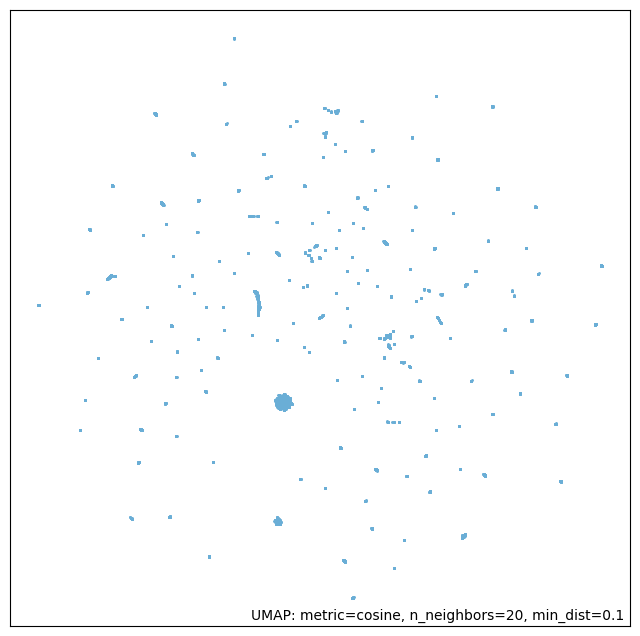

In [222]:
umap.plot.points(umap_trans)

## HDBSCAN

In [153]:
# Run the HDBSCAN function 
cluster_labels, clustering_index, cluster_medoids, runtime = hdbscan_clustering(umap_embeddings, 5)

HDBSCAN finished. Runtime: 0.18s


In [125]:
clustering_index.to_csv(BASE_DIR+'/merged_data/'+'clustering_index.csv', index=False)

In [117]:
merged_df['Cluster'] = cluster_labels
merged_df.drop('Embeddings', axis=1, inplace=True)
merged_df.to_csv(BASE_DIR+'/merged_data/datamerged_df_clustered.csv', index=False)

In [103]:
client = QdrantClient(host="localhost", port=6333)

In [123]:
delete_collection(client , COLLECTION_NAME_CLUSTERED)

Deleting collection: miraculous_clustered


In [124]:
create_collection(client , COLLECTION_NAME_CLUSTERED)

Creating collection: miraculous_clustered


In [120]:
merged_df.drop('Embeddings', axis=1, inplace=True)

In [110]:
# merged_df  = pd.read_csv(BASE_DIR+'/merged_data/datamerged_df_clustered.csv')

In [121]:
merged_df.to_csv(BASE_DIR+'/merged_data/datamerged_df_clustered.csv', index=False)

In [ ]:
# add_to_collection_clustered(BASE_DIR+'/merged_data/datamerged_df_clustered.csv', client, BASE_DIR+EMBEDDINGS_DIR+'all_embeddings.pt', COLLECTION_NAME_CLUSTERED)

In [126]:
table_name = BASE_DIR+'/merged_data/datamerged_df_clustered.csv'
embeddings_path = BASE_DIR+EMBEDDINGS_DIR+'all_embeddings.pt'

In [127]:
# print(f"QDRANT: Adding table {table_name} to {COLLECTION_NAME_CLUSTERED} collection")
assert os.path.exists(table_name), "Table path does not exist"
df = pd.read_csv(table_name)

# Load embeddings
# embeddings_path = table_name.replace('.csv', '.pt')
assert os.path.exists(embeddings_path), "Embeddings path doesn't exist"
embeddings_list_flat = torch.load(embeddings_path)

df['Embeddings'] = embeddings_list_flat

df_unduplicated = df.drop_duplicates(subset='CellValue').reset_index(drop=True)

df_records = df_unduplicated.to_dict('records')


# Add to collection

client.upload_records(
collection_name=COLLECTION_NAME_CLUSTERED,
records=[
    models.Record(
        id=str(uuid.uuid4()), vector=doc['Embeddings'].tolist(), payload={key: value for key, value in doc.items() if key!='Embeddings' }
    )
    for idx, doc in enumerate(df_records)
],
)


In [136]:
clustering_index = pd.read_csv(BASE_DIR+'/merged_data/'+'clustering_index.csv')

In [ ]:
query_text = "Data Scientist"
query_text_emb = model.encode(query_text)


In [143]:
query_text_emb_umap = umap_trans.transform([query_text_emb])

In [172]:
query_text_emb_umap[0].tolist()

[12.470820426940918, 1.0498449802398682]

In [ ]:
clustering_index['Medoid'].values.tolist()

In [175]:
similarities = util.cos_sim(query_text_emb_umap[0], clustering_index['Medoid'].values.tolist())

In [176]:
len(similarities.numpy()[0])

264

In [177]:
clustering_index['Similarity'] = similarities.numpy()[0]

In [180]:
clustering_index = clustering_index.sort_values('Similarity', ascending=False)

In [218]:
top_k_clusters = clustering_index.iloc[:5]

In [219]:
top_k_clusters = top_k_clusters['Cluster'].values.tolist()

In [220]:
top_k_clusters 

[146, 145, 4, 119, 200]

In [201]:
print("ANN SEARCH")
client = QdrantClient("localhost", port=6333)

hits = client.search(
    collection_name=COLLECTION_NAME_CLUSTERED,
    query_vector=model.encode("Data Scientist").tolist(),
    limit=QDRANT_TOP_K,
)

data = []

for hit in hits:
    payload_data = {
        'TableName': hit.payload.get('TableName', None),
        'CellValue': hit.payload.get('CellValue', None),
        'CellValue_Column': hit.payload.get('CellValue_Column', None),
        'Cluster': hit.payload.get('Cluster', None),
        'SimilaritiyScores': hit.score
    }
    data.append(payload_data)

df_ann = pd.DataFrame(data)

df_ann

ANN SEARCH


,TableName,CellValue,CellValue_Column,Cluster,SimilaritiyScores
0,jobs.csv,Data Scientist,Job Name,146,1.000000
1,jobs.csv,Data Analyst,Job Name,146,0.875535
2,jobs.csv,Research Scientist,Job Name,102,0.728945
3,jobs.csv,Researcher,Job Name,102,0.698688
4,jobs.csv,Software Developer,Job Name,145,0.690097
5,jobs.csv,Software Engineer,Job Name,-1,0.683607
6,jobs.csv,Systems Analyst,Job Name,146,0.680318
7,jobs.csv,Financial Analyst,Job Name,173,0.658135
8,jobs.csv,Web Developer,Job Name,145,0.593639
9,jobs.csv,Human Resources Specialist,Job Name,221,0.558448


In [221]:
print("EFFICIENT SEARCH")
client = QdrantClient("localhost", port=6333)

hits = client.search(
    collection_name=COLLECTION_NAME_CLUSTERED,
    query_vector=model.encode("Data Scientist").tolist(),
    query_filter=models.Filter(
    must=[models.FieldCondition(key="Cluster", match=models.MatchAny(any=top_k_clusters))]
    ),
    limit=QDRANT_TOP_K,
)

data = []

for hit in hits:
    payload_data = {
        'TableName': hit.payload.get('TableName', None),
        'CellValue': hit.payload.get('CellValue', None),
        'CellValue_Column': hit.payload.get('CellValue_Column', None),
        'Cluster': hit.payload.get('Cluster', None),
        'SimilaritiyScores': hit.score
    }
    data.append(payload_data)

df_efficient = pd.DataFrame(data)

df_efficient

EFFICIENT SEARCH


,TableName,CellValue,CellValue_Column,Cluster,SimilaritiyScores
0,jobs.csv,Data Scientist,Job Name,146,1.000000
1,jobs.csv,Data Analyst,Job Name,146,0.875535
2,jobs.csv,Software Developer,Job Name,145,0.690097
3,jobs.csv,Systems Analyst,Job Name,146,0.680318
4,jobs.csv,Web Developer,Job Name,145,0.593639
5,jobs.csv,IT Support Specialist,Job Name,146,0.558256
6,jobs.csv,DevOps Engineer,Job Name,145,0.537959
7,jobs.csv,Analytics,Business Capability,146,0.518827
8,jobs.csv,Quality Assurance Engineer,Job Name,146,0.444004
9,jobs.csv,System Administrator,Job Name,119,0.378990


In [205]:
df_ann

,TableName,CellValue,CellValue_Column,Cluster,SimilaritiyScores
0,jobs.csv,Data Scientist,Job Name,146,1.000000
1,jobs.csv,Data Analyst,Job Name,146,0.875535
2,jobs.csv,Research Scientist,Job Name,102,0.728945
3,jobs.csv,Researcher,Job Name,102,0.698688
4,jobs.csv,Software Developer,Job Name,145,0.690097
5,jobs.csv,Software Engineer,Job Name,-1,0.683607
6,jobs.csv,Systems Analyst,Job Name,146,0.680318
7,jobs.csv,Financial Analyst,Job Name,173,0.658135
8,jobs.csv,Web Developer,Job Name,145,0.593639
9,jobs.csv,Human Resources Specialist,Job Name,221,0.558448


In [27]:
count_embeddings_per_cluster(cluster_labels)

In [109]:
unique_embeddings, counts = np.unique(all_embeddings_array, axis=0, return_counts=True)

In [110]:
counts[counts>50]

array([ 65,  76,  61,  74,  77, 137,  55,  56,  51,  64, 127, 270, 897,
        99])

## Efficient Search - Pipeline

In [239]:
from semantic_matching.code.semantic_matching_tables import *

In [241]:
merged_df, all_embeddings = create_data_and_save_embeddings(BASE_DIR+DATA_DIR, BASE_DIR+EMBEDDINGS_DIR)

Processing CSV files:   0%|          | 0/3 [00:00<?, ?it/s]

Processing table: semantic_matching/data/jobs.csv
Processing table: semantic_matching/data/music.csv
Processing table: semantic_matching/data/shopping_trends.csv


Processing CSV files: 100%|██████████| 3/3 [00:00<00:00, 10.10it/s]


In [243]:
embeddings_array = np.vstack(all_embeddings)

In [244]:
knn = precompute_umap_knn(embeddings_array, 20, 'euclidean', save=False, filename="precomputed_knns.joblib")

Computing k-NNs process finished. Runtime: 0.46s


In [247]:
umap_embeddings, umap_trans, _ = generate_umap_embeddings(20, 2, embeddings_array, pre_computed_knn=knn, n_jobs = -1)

UMAP finished. Runtime: 20.57s


In [249]:
cluster_labels, clustering_index, cluster_medoids, runtime = hdbscan_clustering(umap_embeddings, 10)

HDBSCAN finished. Runtime: 0.19s


In [250]:
create_collection(client , COLLECTION_NAME_CLUSTERED)

Creating collection: miraculous_clustered


In [251]:
merged_df['Cluster'] = cluster_labels
merged_df.drop('Embeddings', axis=1, inplace=True)
merged_df.to_csv(BASE_DIR+'/merged_data/datamerged_df_clustered.csv', index=False)

In [252]:
add_to_collection_clustered(BASE_DIR+'/merged_data/datamerged_df_clustered.csv', client, BASE_DIR+EMBEDDINGS_DIR+'/all_embeddings.pt', COLLECTION_NAME_CLUSTERED)

QDRANT: Adding table semantic_matching/merged_data/datamerged_df_clustered.csv to miraculous_clustered collection


'Success'

In [254]:
clustering_index_path = BASE_DIR+'/merged_data/'+'clustering_index.csv'
clustering_index.to_csv(clustering_index_path, index=False)

In [259]:
def cluster_search(query_text, top_k_results, top_k_clusters,  clustering_index_path, umap_trans, client, collection_name):
    
  clustering_index = pd.read_csv(clustering_index_path)

  query_text_emb = model.encode(query_text)

  query_text_emb_umap = umap_trans.transform([query_text_emb])

  similarities = util.cos_sim(query_text_emb_umap[0], clustering_index['Medoid'].values.tolist())

  clustering_index['Similarity'] = similarities.numpy()[0]
  clustering_index = clustering_index.sort_values('Similarity', ascending=False)

  top_k_clusters = clustering_index.iloc[:top_k_clusters]
  top_k_clusters = top_k_clusters['Cluster'].values.tolist()

  print("EFFICIENT SEARCH")
  client = QdrantClient("localhost", port=6333)

  hits = client.search(
      collection_name=collection_name,
      query_vector=query_text_emb.tolist(),
      query_filter=models.Filter(
      must=[models.FieldCondition(key="Cluster", match=models.MatchAny(any=top_k_clusters))]
      ),
      limit=top_k_results,
  )

  data = []

  for hit in hits:
      payload_data = {
          'TableName': hit.payload.get('TableName', None),
          'CellValue': hit.payload.get('CellValue', None),
          'CellValue_Column': hit.payload.get('CellValue_Column', None),
          'Cluster': hit.payload.get('Cluster', None),
          'SimilaritiyScores': hit.score
      }
      data.append(payload_data)

  df_efficient = pd.DataFrame(data)

  return df_efficient

In [260]:
df_efficient = cluster_search("Data Scientist", 10, 10,  clustering_index_path, umap_trans, client, COLLECTION_NAME_CLUSTERED)

c:\Users\leandros\Documents\GitHub\mira_gui\.venv\lib\site-packages\scipy\sparse\_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


ValueError: too many dimensions 'str'

In [ ]:
df_efficient